<h1>Testing the calibration</h1>

After we have confirmed what our E2E simulation images from WebbPSF look like, let's test the calibration script "calibration.py".

In [9]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Path to all the outputs from "aperture_definition.py".
dir = '/Users/ilaginja/Documents/data_from_repos/pastis_data/calibration'
# Change into that directory
os.chdir(dir)

Let's first check the direct and coronagraphic PSF from the E2E simulation.

(1024, 1024)
(1024, 1024)


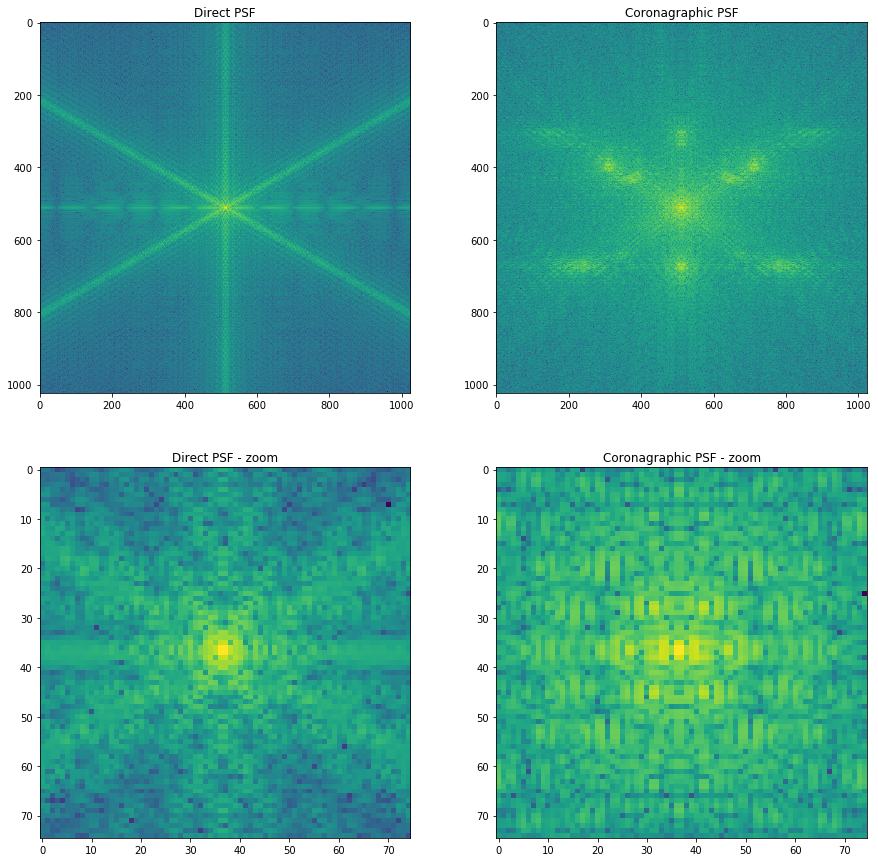

In [17]:
psf_direct = fits.getdata('psf_default.fits')
psf_coro = fits.getdata('psf_coro.fits')
print(psf_direct.shape)
print(psf_coro.shape)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(psf_direct, norm=LogNorm())
plt.title('Direct PSF')

plt.subplot(2, 2, 2)
plt.imshow(psf_coro, norm=LogNorm())
plt.title('Coronagraphic PSF')

plt.subplot(2, 2, 3)
plt.imshow(psf_direct[475:550, 475:550], norm=LogNorm())
plt.title('Direct PSF - zoom')

plt.subplot(2, 2, 4)
plt.imshow(psf_coro[475:550, 475:550], norm=LogNorm())
plt.title('Coronagraphic PSF - zoom')

plt.show()

Load the dark hole and see what it looks like by itseld and when overlapped with the two images.

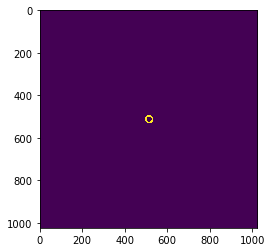

In [18]:
dh = fits.getdata('dh_area.fits')
plt.imshow(dh)
plt.show()

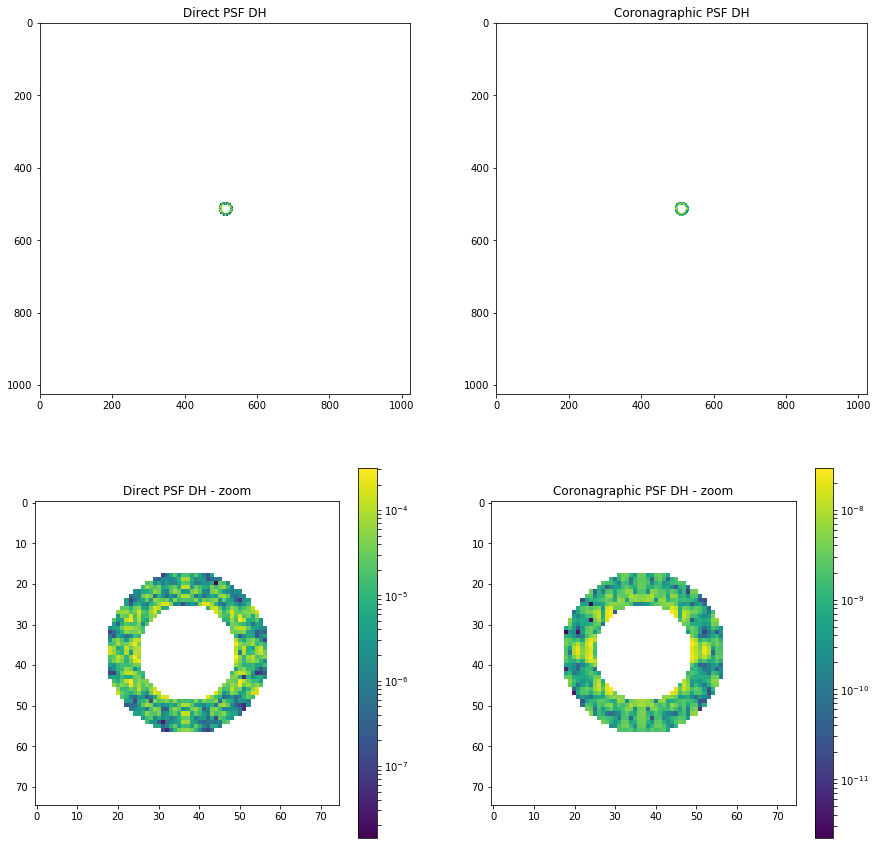

In [23]:
# DH over PSFs (dh over direct PSF is a useles concept, but I wanted to see what it looks like).
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(psf_direct*dh, norm=LogNorm())
plt.title('Direct PSF DH')

plt.subplot(2, 2, 2)
plt.imshow(psf_coro*dh, norm=LogNorm())
plt.title('Coronagraphic PSF DH')

plt.subplot(2, 2, 3)
plt.imshow((psf_direct*dh)[475:550, 475:550], norm=LogNorm())
plt.title('Direct PSF DH - zoom')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow((psf_coro*dh)[475:550, 475:550], norm=LogNorm())
plt.title('Coronagraphic PSF DH - zoom')
plt.colorbar()

plt.show()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])